In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
from sympy import *
import time as dt
from sklearn.linear_model import LinearRegression
import warnings
from IPython.display import Math,Latex
from pandas.errors import SettingWithCopyWarning
from statsmodels.api import *
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from matplobblib.econometrics import *

init_printing(use_unicode=True,use_latex=True)

# 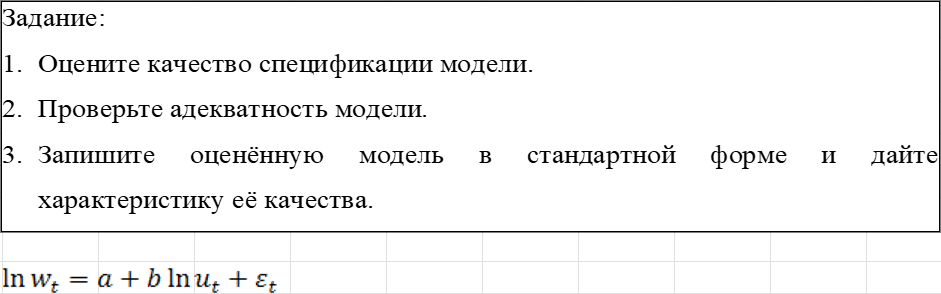

## Построим модель на изначальных данных

<IPython.core.display.Math object>

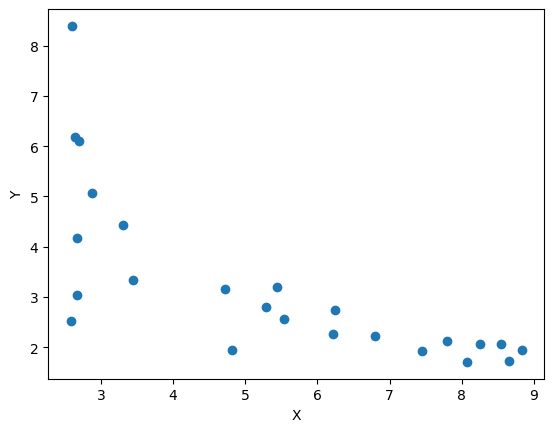

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.529
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     24.69
Date:                Wed, 06 Nov 2024   Prob (F-statistic):           5.69e-05
Time:                        21:07:07   Log-Likelihood:                -44.514
No. Observations:                  24   AIC:                             93.03
Df Residuals:                      22   BIC:                             95.38
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.5344      0.723     11.811      0.000       7.036      10.033
x1            -0.9869      0.199     -4.968      0.000      -1.399      -0.575
==============================================================================
Omnibus:                        0.885   Durbin-Watson:                   1.548
Prob(Omnibus):                  0.642   Jarque-Bera (JB):                0.863
Skew:                          -0.388   Prob(JB):                        0.650
Kurtosis:                       2.490   Cond. No.                         8.46
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Коэффициент Детерминаци равен: 52,876% .

Коэфициенты b при каждом члене равны соответственно: [ 8.53436564 -0.98693237] .

Коэффициент 8,534365644773835 стат. значим, т.к. значение t = 11,8107 больше t_критического = 2,0739 <=> pvalue=5,392018032705428e-11 < 0,05

Коэффициент -0,9869323654855446 стат. значим, т.к. значение t = 4,9684 больше t_критического = 2,0739 <=> pvalue=5,687173134013915e-05 < 0,05


Регрессия стат. значима, т.к. F-значение критерия фишера = 24,6853 больше F_критического <=> fvalue=5,687173134013903e-05 < 0,05


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Это метрика, которая используется для оценки точности модели.
Она показывает, насколько модель отклоняется от истинных значений в среднем в процентах.


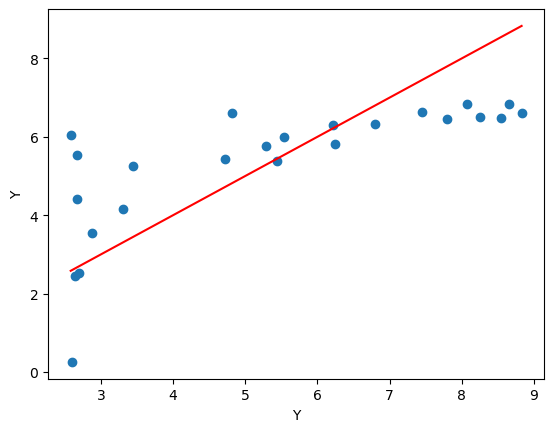

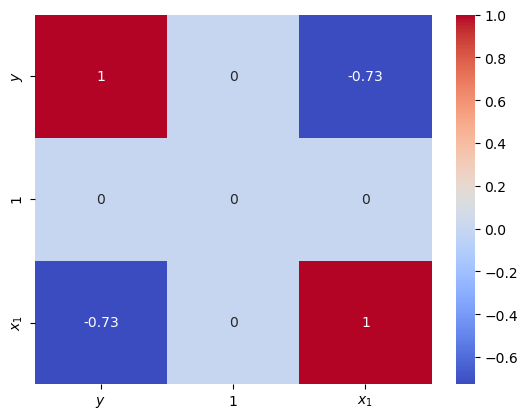

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Статистика: 0.8630936077612793
p-значение: 0.6495036625348791
Данные распределены нормально (не отвергаем H0)



<IPython.core.display.Math object>

Статистика: 0.9637312929369378
p-значение: 0.5178252899852493
Данные распределены нормально (не отвергаем H0)



<IPython.core.display.Math object>

Максимальное отклонение (D): 0.07423655352879718
Нет оснований отвергнуть H0 на уровне значимости 0.05.


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Осуществим этот тест на преобразованных для модели данных
Согласно тесту Голдфельда-Куандта, данные гомоскедастичны: 0.22774694628192121 > 0.05
Это заметно и на графике:


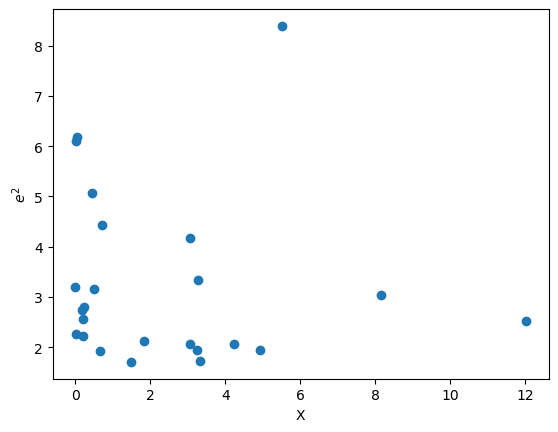

Осуществим этот тест на изначальных данных
Согласно тесту Голдфельда-Куандта, данные гомоскедастичны: 0.22774694628192121 > 0.05

Это заметно и на графике:


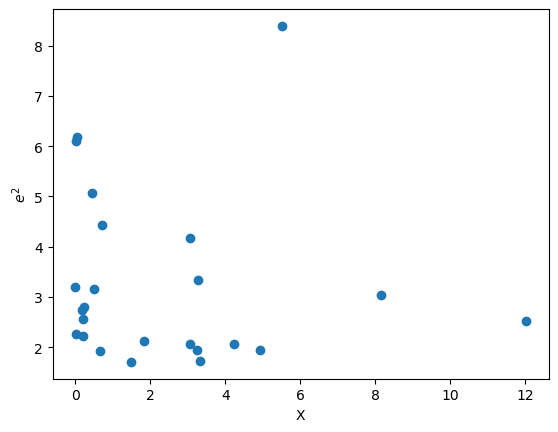

In [ ]:
from matplobblib.econometrics import *

t1=pd.read_excel('Дз 3 нелинейная.xlsx','Лист2',usecols=[0,1,2],index_col=0,names=['t','w','u'])

m1 = make_model_outputs(t1[['u']],t1[['w']])

In [ ]:
a,b,u, E = symbols('a b u \Epsilon')
w = exp(a) * u**b + E
print(f'Уравнение нелинейной регрессии:')
display(Math('w = '+latex(w)))
w = w.subs(a,round(m1.params.iloc[0],4))
w = w.subs(b,round(m1.params.iloc[1],4))
display(Math('w = '+latex(w)))

prediction2 = np.e** m1.predict(t1[['1','lnu']].values)
r2 = r2_score(t1[['w']].values,prediction2)
print(f'Коэффициент Детерминаци равен: {str(round(r2*100,3)).replace(".",",")}% .')



Уравнение нелинейной регрессии:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Коэффициент Детерминаци равен: 58,124% .


## Стандартизируем модель

Константа, при построении модели с ней, статистически незначима.(0.9999999999999974>0.05)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               ln_std_w   R-squared (uncentered):                   0.682
Model:                            OLS   Adj. R-squared (uncentered):              0.669
Method:                 Least Squares   F-statistic:                              49.41
Date:                Wed, 06 Nov 2024   Prob (F-statistic):                    3.66e-07
Time:                        00:09:04   Log-Likelihood:                         -20.293
No. Observations:                  24   AIC:                                      42.59
Df Residuals:                      23   BIC:                                      43.76
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ln_std_u      -0.8260      0.118     -7.029      0.000      -1.069      -0.583
==============================================================================
Omnibus:                        4.052   Durbin-Watson:                   1.103
Prob(Omnibus):                  0.132   Jarque-Bera (JB):                2.290
Skew:                          -0.477   Prob(JB):                        0.318
Kurtosis:                       4.174   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Коэффициент Детерминаци равен: 68,235% .

Коэфициенты b при каждом члене равны соответственно: -0,8260476877422089 .

Коэффициент -0,8260476877422089 стат. значим, т.к. значение t = 7,0291 больше t_критического = 2,0739 <=> pvalue=3,6637058596786566e-07 < 0,05


Регрессия стат. значима, т.к. F-значение критерия фишера = 49,4078 больше F_критического <=> fvalue=3,6637058596786704e-07 < 0,05


<IPython.core.display.Math object>

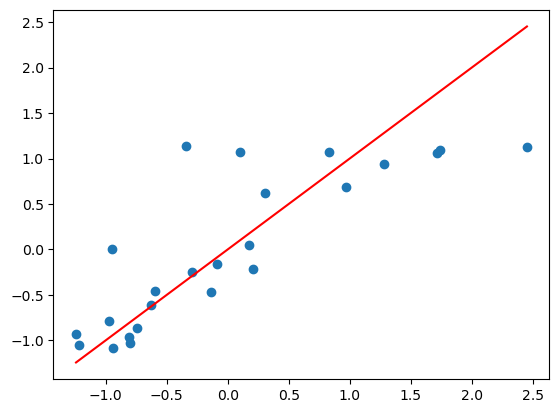

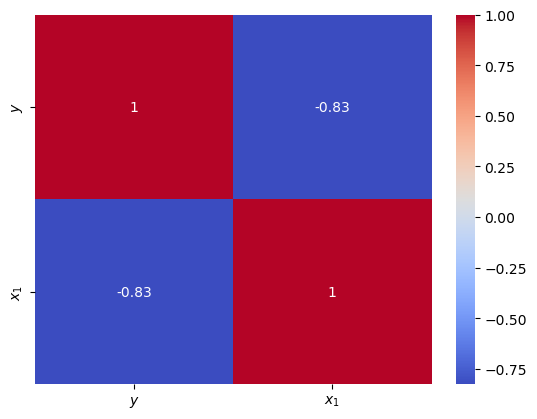

Уравнение нелинейной регрессии:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Уравнение линейной регрессии:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

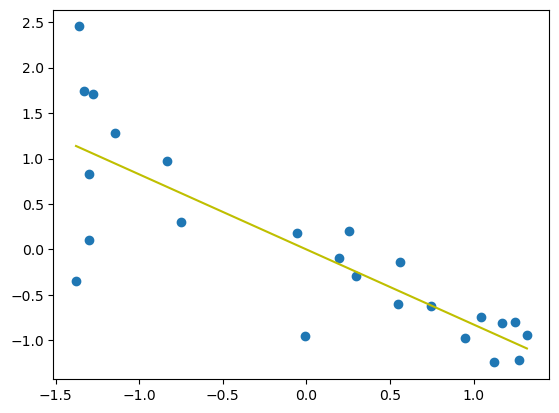

In [17]:
s1=StandardScaler()
t1['ln_std_u']=s1.fit_transform(t1['lnu'].values.reshape(-1,1))
t1['ln_std_w']=s1.fit_transform(t1['lnw'].values.reshape(-1,1))


m1 = make_model_outputs(t1[['ln_std_w']],t1[['ln_std_u']],0.05)


b,u, E = symbols('beta_1 u \Epsilon')
w =u**b + E
print(f'Уравнение нелинейной регрессии:')
display(Math('w = '+latex(w)))
w = w.subs(b,round(m1.params.iloc[0],4))
display(Math('w = '+latex(w)))


b,u, E = symbols('beta_1 ln(u) \Epsilon')
w =b*u + E
print(f'Уравнение линейной регрессии:')
display(Math('ln(w) = '+latex(w)))
w = w.subs(b,round(m1.params.iloc[0],4))
display(Math('ln(w) = '+latex(w)))


xx= np.linspace(t1[['ln_std_u']].min(), t1[['ln_std_u']].max(), 100)
yy= m1.predict(xx).reshape(-1, 1)

plt.scatter(t1[['ln_std_u']].values,t1[['ln_std_w']].values)
plt.plot(xx,yy,c='y')
plt.show()

# 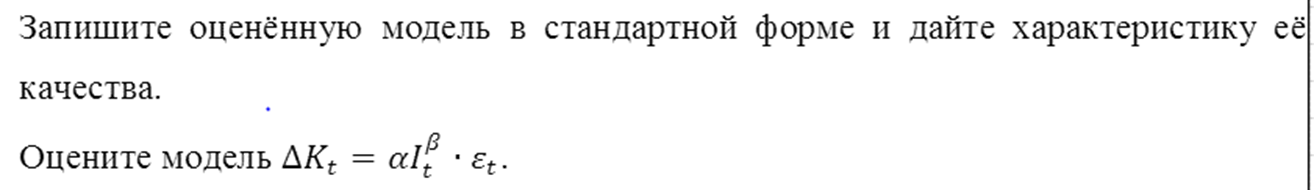

$$
\Delta K_t = \alpha I_t^\beta \times \epsilon_t\\
\ln(\Delta K_t ) = \ln(\alpha) + \beta \times\ln(I_t) + \epsilon_t
$$

## Построим модель на изначальных данных

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     1359.
Date:                Tue, 05 Nov 2024   Prob (F-statistic):           2.58e-23
Time:                        23:59:03   Log-Likelihood:                 41.209
No. Observations:                  27   AIC:                            -78.42
Df Residuals:                      25   BIC:                            -75.83
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
lnI            0.9726      0.026     36.869      0.000       0.918       1.027
1              0.0363      0.117      0.311      0.759      -0.204       0.277
==============================================================================
Omnibus:                       18.786   Durbin-Watson:                   0.522
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.506
Skew:                          -1.489   Prob(JB):                     1.06e-06
Kurtosis:                       6.947   Cond. No.                         51.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     1359.
Date:                Tue, 05 Nov 2024   Prob (F-statistic):           2.58e-23
Time:                        23:59:03   Log-Likelihood:                 41.209
No. Observations:                  27   AIC:                            -78.42
Df Residuals:                      25   BIC:                            -75.83
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
lnI            0.9726      0.026     36.869      0.000       0.918       1.027
1              0.0363      0.117      0.311      0.759      -0.204       0.277
==============================================================================
Omnibus:                       18.786   Durbin-Watson:                   0.522
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.506
Skew:                          -1.489   Prob(JB):                     1.06e-06
Kurtosis:                       6.947   Cond. No.                         51.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Коэффициент Детерминаци равен: 98,194% .

Коэфициенты b при каждом члене равны соответственно: 0,9726013794191091; 0,03626064833517084 .

Коэффициент 0,9726013794191091 стат. значим, т.к. значение t = 36,8692 больше t_критического = 2,0595 <=> pvalue=2,5764166737745987e-23 < 0,05

Коэффициент 0,03626064833517084 стат. незначим, т.к. значение t = 0,3107 меньше t_критического = 2,0595 <=> pvalue=0,7585750524336108 > 0,05


Регрессия стат. значима, т.к. F-значение критерия фишера = 1359,3374 больше F_критического <=> fvalue=2,5764166737745728e-23 < 0,05


<IPython.core.display.Math object>

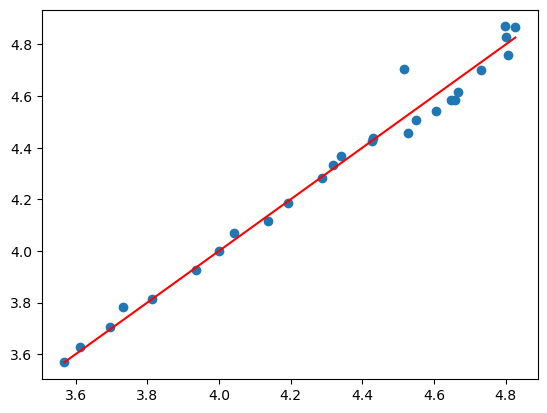

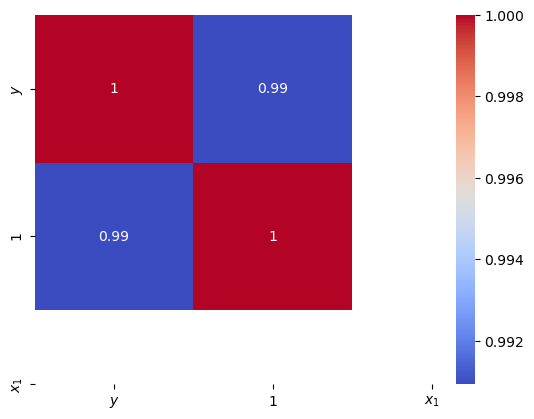

Коэффициент Детерминаци равен: 96,498% .


In [ ]:
t2=pd.read_excel('Дз 3 нелинейная.xlsx','Лист3',usecols=[0,1,2],index_col=0,names=['Год','K','I'])

t2['1']=[1]*t2.shape[0]
t2['lnK']=np.log(t2['K'])
t2['lnI']=np.log(t2['I'])

m2 = OLS(t2[['lnK']].iloc[:,0].values,t2[['lnI','1']]).fit()
display(m2.summary())
    

xx= np.linspace(t2[['I']].min(), t2[['I']].max(), 100).reshape((-1,1))
xx = np.concatenate([xx,np.ones(xx.shape[0]).reshape((-1,1))],axis=1)
prediction = np.e** m2.predict(xx)
prediction2 = np.e** m2.predict(t2[['lnI','1']].values)

make_model_outputs(m2,0.05)


r2 = (r2_score(t2[['K']].iloc[:,0].values,prediction2))
print(f'Коэффициент Детерминаци равен: {str(round(r2*100,3)).replace(".",",")}% .')

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.763e+05
Date:                Tue, 05 Nov 2024   Prob (F-statistic):                    2.42e-51
Time:                        23:59:03   Log-Likelihood:                          41.157
No. Observations:                  27   AIC:                                     -80.31
Df Residuals:                      26   BIC:                                     -79.02
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
lnI            0.9808      0.002    419.829      0.000       0.976       0.986
==============================================================================
Omnibus:                       20.825   Durbin-Watson:                   0.518
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.803
Skew:                          -1.629   Prob(JB):                     7.53e-08
Kurtosis:                       7.306   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.763e+05
Date:                Tue, 05 Nov 2024   Prob (F-statistic):                    2.42e-51
Time:                        23:59:03   Log-Likelihood:                          41.157
No. Observations:                  27   AIC:                                     -80.31
Df Residuals:                      26   BIC:                                     -79.02
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
lnI            0.9808      0.002    419.829      0.000       0.976       0.986
==============================================================================
Omnibus:                       20.825   Durbin-Watson:                   0.518
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.803
Skew:                          -1.629   Prob(JB):                     7.53e-08
Kurtosis:                       7.306   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Коэффициент Детерминаци равен: 99,985% .

Коэфициенты b при каждом члене равны соответственно: 0,9807652414335774 .

Коэффициент 0,9807652414335774 стат. значим, т.к. значение t = 419,829 больше t_критического = 2,0595 <=> pvalue=2,4224054494664673e-51 < 0,05


Регрессия стат. значима, т.к. F-значение критерия фишера = 176256,354 больше F_критического <=> fvalue=2,4224054494664916e-51 < 0,05


<IPython.core.display.Math object>

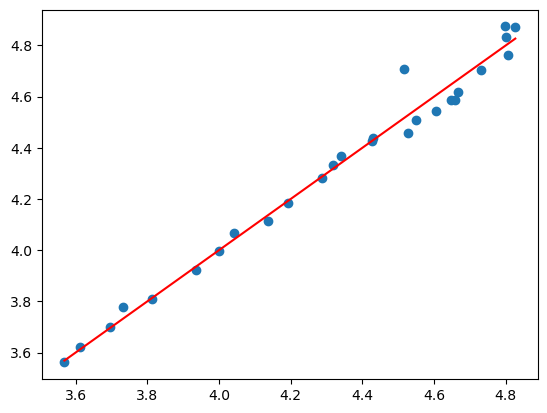

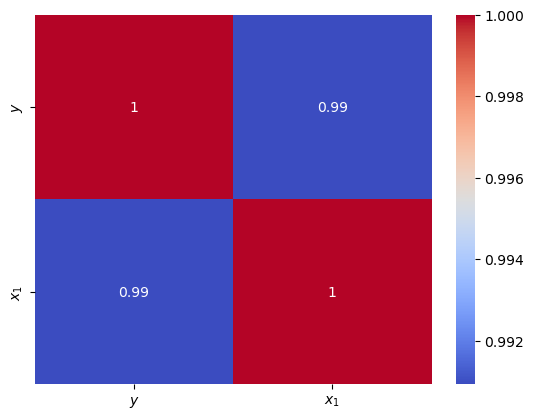

Коэффициент Детерминаци равен: 96,428% .
Уравнение нелинейной регрессии:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

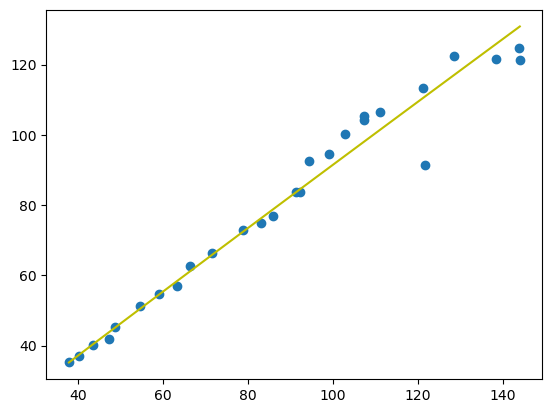

In [ ]:
m2 = OLS(t2[['lnK']].iloc[:,0].values,t2[['lnI']]).fit()
display(m2.summary())
    

xx= np.linspace(t2[['I']].min(), t2[['I']].max(), 100).reshape((-1,1))
prediction = np.e** m2.predict(xx)
prediction2 = np.e** m2.predict(t2[['lnI']].values)
make_model_outputs(m2,0.05)


r2 = (r2_score(t2[['K']].iloc[:,0].values,prediction2))
print(f'Коэффициент Детерминаци равен: {str(round(r2*100,3)).replace(".",",")}% .')

b,I, E= symbols('beta, I_t, epsilon')
K = I**b + E
print(f'Уравнение нелинейной регрессии:')
display(Math('K = '+latex(K)))
K = K.subs(b,round(m2.params.iloc[0],4))
display(Math('K = '+latex(K)))

xx= np.linspace(t2[['I']].min(), t2[['I']].max(), 100)
yy= np.exp(m2.predict(np.log(xx).reshape(-1, 1)))

plt.scatter(t2[['I']].values,t2[['K']].values)
plt.plot(xx,yy,c='y')
plt.show()

## Стандартизируем модель

,K,I,1,lnK,lnI,ln_std_K,ln_std_I
Год,,,,,,,
1994,35.474,37.759,1,3.568800,3.631224,-1.922270,-1.941944
1995,37.096,40.131,1,3.613509,3.692149,-1.808026,-1.789143
1996,40.319,43.412,1,3.696823,3.770736,-1.595136,-1.592046
1997,41.816,47.094,1,3.733279,3.852146,-1.501980,-1.387869
1998,45.239,48.579,1,3.811960,3.883191,-1.300929,-1.310006
1999,51.176,54.564,1,3.935271,3.999374,-0.985835,-1.018617
2000,54.609,58.884,1,4.000199,4.075569,-0.819926,-0.827518
2001,56.980,63.251,1,4.042700,4.147111,-0.711322,-0.648091
2002,62.604,66.325,1,4.136829,4.194567,-0.470797,-0.529070


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               ln_std_K   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.981
Method:                 Least Squares   F-statistic:                              1414.
Date:                Tue, 05 Nov 2024   Prob (F-statistic):                    3.40e-24
Time:                        23:59:03   Log-Likelihood:                          15.879
No. Observations:                  27   AIC:                                     -29.76
Df Residuals:                      26   BIC:                                     -28.46
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ln_std_I       0.9909      0.026     37.599      0.000       0.937       1.045
==============================================================================
Omnibus:                       18.786   Durbin-Watson:                   0.522
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.506
Skew:                          -1.489   Prob(JB):                     1.06e-06
Kurtosis:                       6.947   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               ln_std_K   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.981
Method:                 Least Squares   F-statistic:                              1414.
Date:                Tue, 05 Nov 2024   Prob (F-statistic):                    3.40e-24
Time:                        23:59:03   Log-Likelihood:                          15.879
No. Observations:                  27   AIC:                                     -29.76
Df Residuals:                      26   BIC:                                     -28.46
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ln_std_I       0.9909      0.026     37.599      0.000       0.937       1.045
==============================================================================
Omnibus:                       18.786   Durbin-Watson:                   0.522
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.506
Skew:                          -1.489   Prob(JB):                     1.06e-06
Kurtosis:                       6.947   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Коэффициент Детерминаци равен: 98,194% .

Коэфициенты b при каждом члене равны соответственно: 0,9909292700664827 .

Коэффициент 0,9909292700664827 стат. значим, т.к. значение t = 37,5993 больше t_критического = 2,0595 <=> pvalue=3,396455335888668e-24 < 0,05


Регрессия стат. значима, т.к. F-значение критерия фишера = 1413,7109 больше F_критического <=> fvalue=3,39645533588866e-24 < 0,05


<IPython.core.display.Math object>

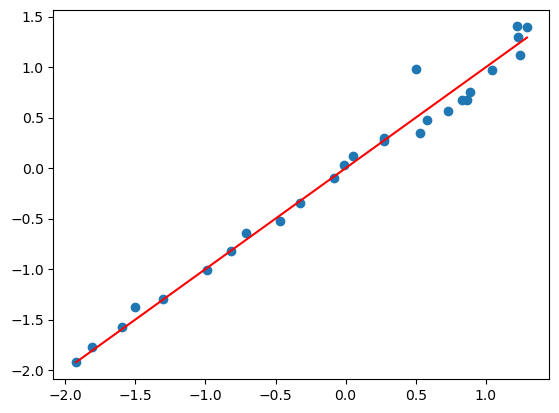

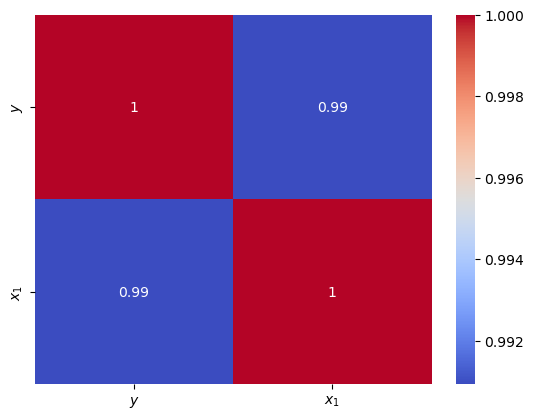

Уравнение нелинейной регрессии:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Уравнение линейной регрессии:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

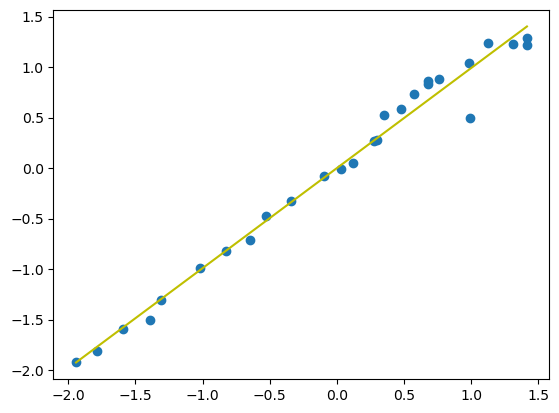

In [ ]:
s1=StandardScaler()
t2['ln_std_K']=s1.fit_transform(t2['lnK'].values.reshape(-1,1))
t2['ln_std_I']=s1.fit_transform(t2['lnI'].values.reshape(-1,1))

display(t2)

m2 = OLS(t2[['ln_std_K']],t2[['ln_std_I']]).fit()
display(m2.summary())
make_model_outputs(m2,0.05)

b,I, E= symbols('beta, I_t, epsilon')
K = I**b + E
print(f'Уравнение нелинейной регрессии:')
display(Math('K = '+latex(K)))
K = K.subs(b,round(m2.params.iloc[0],4))
display(Math('K = '+latex(K)))


b,I, E= symbols('beta, ln(I_{t}), epsilon')
K =b*I + E
print(f'Уравнение линейной регрессии:')
display(Math('ln(K) = '+latex(K)))
K = K.subs(b,round(m2.params.iloc[0],4))
display(Math('ln(K) = '+latex(K)))


xx= np.linspace(t2[['ln_std_I']].min(), t2[['ln_std_I']].max(), 100)
yy= m2.predict(xx).reshape(-1, 1)

plt.scatter(t2[['ln_std_I']].values,t2[['ln_std_K']].values)
plt.plot(xx,yy,c='y')
plt.show()

# 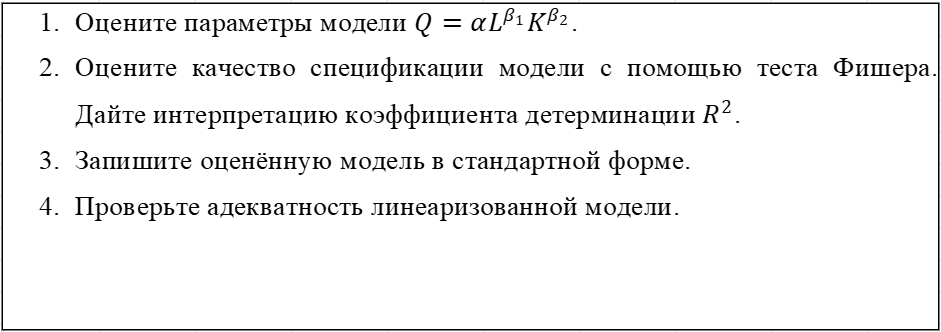

## Построим модель на изначальных данных

,Q,L,K,lnQ,lnL,lnK,1
Фирма,,,,,,,
1,2350,2334,1570,7.762171,7.755339,7.358831,1
2,2470,2425,1850,7.811973,7.793587,7.522941,1
3,2110,2230,1150,7.654443,7.709757,7.047517,1
4,2560,2463,1940,7.847763,7.809135,7.570443,1
5,2650,2565,2450,7.882315,7.849714,7.803843,1
6,2240,2278,1340,7.714231,7.731053,7.200425,1
7,2430,2380,1700,7.795647,7.774856,7.438384,1
8,2530,2437,1860,7.835975,7.798523,7.528332,1
9,2550,2446,2446,7.843849,7.802209,7.802209,1


c:\Users\ivant\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    lnQ   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     163.6
Date:                Tue, 05 Nov 2024   Prob (F-statistic):           1.96e-09
Time:                        23:59:03   Log-Likelihood:                 44.745
No. Observations:                  15   AIC:                            -83.49
Df Residuals:                      12   BIC:                            -81.37
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
1             -5.3417      0.829     -6.443      0.000      -7.148      -3.535
lnL            1.6809      0.116     14.477      0.000       1.428       1.934
lnK            0.0077      0.019      0.415      0.685      -0.033       0.048
==============================================================================
Omnibus:                        6.644   Durbin-Watson:                   2.148
Prob(Omnibus):                  0.036   Jarque-Bera (JB):                3.999
Skew:                          -1.241   Prob(JB):                        0.135
Kurtosis:                       3.483   Cond. No.                     2.58e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.58e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Уравнение нелинейной регрессии:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

c:\Users\ivant\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    lnQ   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     163.6
Date:                Tue, 05 Nov 2024   Prob (F-statistic):           1.96e-09
Time:                        23:59:03   Log-Likelihood:                 44.745
No. Observations:                  15   AIC:                            -83.49
Df Residuals:                      12   BIC:                            -81.37
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
1             -5.3417      0.829     -6.443      0.000      -7.148      -3.535
lnL            1.6809      0.116     14.477      0.000       1.428       1.934
lnK            0.0077      0.019      0.415      0.685      -0.033       0.048
==============================================================================
Omnibus:                        6.644   Durbin-Watson:                   2.148
Prob(Omnibus):                  0.036   Jarque-Bera (JB):                3.999
Skew:                          -1.241   Prob(JB):                        0.135
Kurtosis:                       3.483   Cond. No.                     2.58e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.58e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Коэффициент Детерминаци равен: 96,462% .

Коэфициенты b при каждом члене равны соответственно: -5,341670376619618; 1,6809432632307555; 0,007704622816963713 .

Коэффициент -5,341670376619618 стат. значим, т.к. значение t = 6,4432 больше t_критического = 2,1788 <=> pvalue=3,1919952969638325e-05 < 0,05

Коэффициент 1,6809432632307555 стат. значим, т.к. значение t = 14,4774 больше t_критического = 2,1788 <=> pvalue=5,826128816733424e-09 < 0,05

Коэффициент 0,007704622816963713 стат. незначим, т.к. значение t = 0,4153 меньше t_критического = 2,1788 <=> pvalue=0,6852734964090719 > 0,05


Регрессия стат. значима, т.к. F-значение критерия фишера = 163,6068 больше F_критического <=> fvalue=1,9599620513876233e-09 < 0,05
Нет коэффициентов


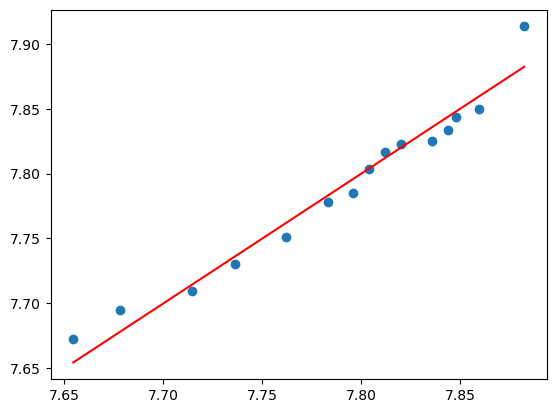

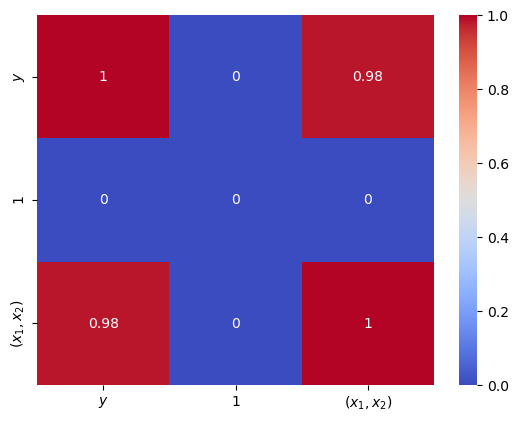



Коэффициент при ln(K) не значим по t-критерию стьдента, значит его не стоит учитывать. Построим модель без него. 


c:\Users\ivant\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    lnQ   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     349.3
Date:                Tue, 05 Nov 2024   Prob (F-statistic):           8.92e-11
Time:                        23:59:04   Log-Likelihood:                 44.638
No. Observations:                  15   AIC:                            -85.28
Df Residuals:                      13   BIC:                            -83.86
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
1             -5.5010      0.711     -7.736      0.000      -7.037      -3.965
lnL            1.7090      0.091     18.689      0.000       1.511       1.907
==============================================================================
Omnibus:                        7.273   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.026   Jarque-Bera (JB):                4.414
Skew:                          -1.295   Prob(JB):                        0.110
Kurtosis:                       3.598   Cond. No.                     1.64e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.64e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

c:\Users\ivant\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    lnQ   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     349.3
Date:                Tue, 05 Nov 2024   Prob (F-statistic):           8.92e-11
Time:                        23:59:04   Log-Likelihood:                 44.638
No. Observations:                  15   AIC:                            -85.28
Df Residuals:                      13   BIC:                            -83.86
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
1             -5.5010      0.711     -7.736      0.000      -7.037      -3.965
lnL            1.7090      0.091     18.689      0.000       1.511       1.907
==============================================================================
Omnibus:                        7.273   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.026   Jarque-Bera (JB):                4.414
Skew:                          -1.295   Prob(JB):                        0.110
Kurtosis:                       3.598   Cond. No.                     1.64e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.64e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Коэффициент Детерминаци равен: 96,412% .

Коэфициенты b при каждом члене равны соответственно: -5,501021987061762; 1,7089577240081084 .

Коэффициент -5,501021987061762 стат. значим, т.к. значение t = 7,7359 больше t_критического = 2,1604 <=> pvalue=3,223205444753363e-06 < 0,05

Коэффициент 1,7089577240081084 стат. значим, т.к. значение t = 18,6889 больше t_критического = 2,1604 <=> pvalue=8,920073563460382e-11 < 0,05


Регрессия стат. значима, т.к. F-значение критерия фишера = 349,2753 больше F_критического <=> fvalue=8,920073563460092e-11 < 0,05


<IPython.core.display.Math object>

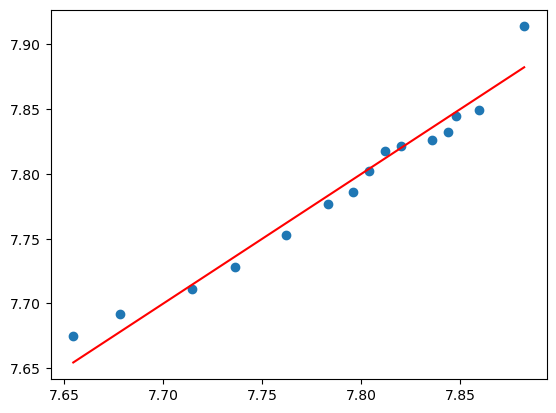

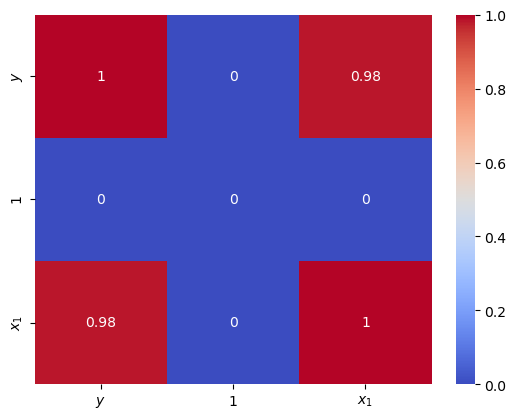

Уравнение нелинейной регрессии:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Уравнение линейной регрессии:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

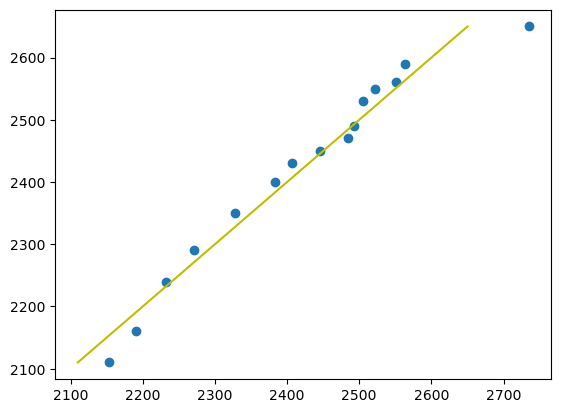

In [ ]:
t3=pd.read_excel('Дз 3 нелинейная.xlsx','Лист4',usecols=[0,1,2,3],index_col=0,header=0)

for i in t3.columns:
    t3[f'ln{i}']=np.log(t3[f'{i}'])
t3['1']=[1]*t3.shape[0]
display(t3)
m3 = OLS(t3[['lnQ']],t3[['1','lnL','lnK']]).fit()
display(m3.summary())

a,b_1,b_2,K,L,E= symbols('alpha,beta_1,beta_2, K,L, epsilon')
Q = exp(a)*L**b_1*K**b_2 + E
print(f'Уравнение нелинейной регрессии:')
display(Math('Q = '+latex(Q)))
Q = Q.subs(a,round(m3.params.iloc[0],4))
Q = Q.subs(b_1,round(m3.params.iloc[1],4))
Q = Q.subs(b_2,round(m3.params.iloc[2],4))

display(Math('Q = '+latex(Q)))


make_model_outputs(m3,0.05)



print('\n\nКоэффициент при ln(K) не значим по t-критерию стьдента, значит его не стоит учитывать. Построим модель без него. ')
m4 = OLS(t3[['lnQ']],t3[['1','lnL']]).fit()
display(m4.summary())
make_model_outputs(m4,0.05)

a,b_1,K,L, E= symbols('alpha,beta_1, K,L, epsilon')
Q = exp(a)*L**b_1 + E
print(f'Уравнение нелинейной регрессии:')
display(Math('Q = '+latex(Q)))
Q = Q.subs(a,round(m4.params.iloc[0],4))
Q = Q.subs(b_1,round(m4.params.iloc[1],4))

display(Math('Q = '+latex(Q)))


a,b_1,K,L, E= symbols('alpha,beta_1, K,ln(L), epsilon')
Q = a + L*b_1 + E
print(f'Уравнение линейной регрессии:')
display(Math('ln(Q) = '+latex(Q)))
Q = Q.subs(a,round(m4.params.iloc[0],4))
Q = Q.subs(b_1,round(m4.params.iloc[1],4))
display(Math('ln(Q) = '+latex(Q)))





plt.scatter(np.exp(m4.predict(t3[['1','lnL']].values)),t3[['Q']].values)
plt.plot([t3[['Q']].min(),t3[['Q']].max()],[t3[['Q']].min(),t3[['Q']].max()],color='y')
plt.show()

## Стандартизируем модель

,Q,L,K,lnQ,lnL,lnK,1,ln_std_Q,ln_std_L,ln_std_K
Фирма,,,,,,,,,,
1,2350,2334,1570,7.762171,7.755339,7.358831,1,-0.405738,-0.564020,-0.999808
2,2470,2425,1850,7.811973,7.793587,7.522941,1,0.358718,0.457800,-0.299227
3,2110,2230,1150,7.654443,7.709757,7.047517,1,-2.059317,-1.781771,-2.328798
4,2560,2463,1940,7.847763,7.809135,7.570443,1,0.908069,0.873190,-0.096440
5,2650,2565,2450,7.882315,7.849714,7.803843,1,1.438437,1.957267,0.899938
6,2240,2278,1340,7.714231,7.731053,7.200425,1,-1.141593,-1.212827,-1.676039
7,2430,2380,1700,7.795647,7.774856,7.438384,1,0.108106,-0.042612,-0.660200
8,2530,2437,1860,7.835975,7.798523,7.528332,1,0.727128,0.589675,-0.276213
9,2550,2446,2446,7.843849,7.802209,7.802209,1,0.847992,0.688156,0.892963


c:\Users\ivant\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               ln_std_Q   R-squared (uncentered):                   0.965
Model:                            OLS   Adj. R-squared (uncentered):              0.959
Method:                 Least Squares   F-statistic:                              177.2
Date:                Tue, 05 Nov 2024   Prob (F-statistic):                    3.69e-10
Time:                        23:59:04   Log-Likelihood:                          3.7788
No. Observations:                  15   AIC:                                     -3.558
Df Residuals:                      13   BIC:                                     -2.142
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ln_std_L       0.9658      0.064     15.069      0.000       0.827       1.104
ln_std_K       0.0277      0.064      0.432      0.673      -0.111       0.166
==============================================================================
Omnibus:                        6.644   Durbin-Watson:                   2.148
Prob(Omnibus):                  0.036   Jarque-Bera (JB):                3.999
Skew:                          -1.241   Prob(JB):                        0.135
Kurtosis:                       3.483   Cond. No.                         1.94
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

c:\Users\ivant\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               ln_std_Q   R-squared (uncentered):                   0.965
Model:                            OLS   Adj. R-squared (uncentered):              0.959
Method:                 Least Squares   F-statistic:                              177.2
Date:                Tue, 05 Nov 2024   Prob (F-statistic):                    3.69e-10
Time:                        23:59:04   Log-Likelihood:                          3.7788
No. Observations:                  15   AIC:                                     -3.558
Df Residuals:                      13   BIC:                                     -2.142
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ln_std_L       0.9658      0.064     15.069      0.000       0.827       1.104
ln_std_K       0.0277      0.064      0.432      0.673      -0.111       0.166
==============================================================================
Omnibus:                        6.644   Durbin-Watson:                   2.148
Prob(Omnibus):                  0.036   Jarque-Bera (JB):                3.999
Skew:                          -1.241   Prob(JB):                        0.135
Kurtosis:                       3.483   Cond. No.                         1.94
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Коэффициент Детерминаци равен: 96,462% .

Коэфициенты b при каждом члене равны соответственно: 0,9657980186094612; 0,027702992918669705 .

Коэффициент 0,9657980186094612 стат. значим, т.к. значение t = 15,0685 больше t_критического = 2,1788 <=> pvalue=1,3050315502238635e-09 < 0,05

Коэффициент 0,027702992918669705 стат. незначим, т.к. значение t = 0,4322 меньше t_критического = 2,1788 <=> pvalue=0,6726602487227937 > 0,05


Регрессия стат. значима, т.к. F-значение критерия фишера = 177,2407 больше F_критического <=> fvalue=3,6863930154352747e-10 < 0,05


<IPython.core.display.Math object>

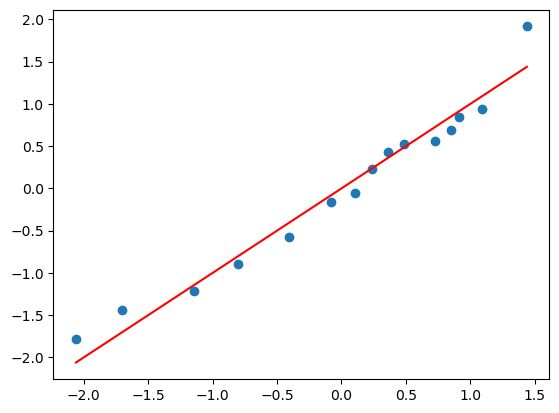

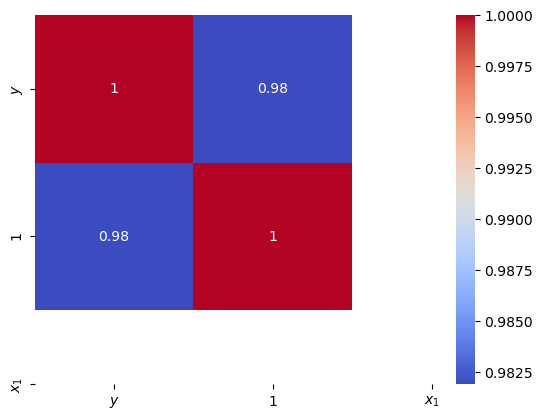



Коэффициент при стандартизированном ln(K) не значим по t-критерию стьдента, значит его не стоит учитывать. Построим модель без него. 


c:\Users\ivant\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               ln_std_Q   R-squared (uncentered):                   0.964
Model:                            OLS   Adj. R-squared (uncentered):              0.962
Method:                 Least Squares   F-statistic:                              376.1
Date:                Tue, 05 Nov 2024   Prob (F-statistic):                    1.63e-11
Time:                        23:59:04   Log-Likelihood:                          3.6718
No. Observations:                  15   AIC:                                     -5.344
Df Residuals:                      14   BIC:                                     -4.636
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ln_std_L       0.9819      0.051     19.394      0.000       0.873       1.090
==============================================================================
Omnibus:                        7.273   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.026   Jarque-Bera (JB):                4.414
Skew:                          -1.295   Prob(JB):                        0.110
Kurtosis:                       3.598   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

c:\Users\ivant\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               ln_std_Q   R-squared (uncentered):                   0.964
Model:                            OLS   Adj. R-squared (uncentered):              0.962
Method:                 Least Squares   F-statistic:                              376.1
Date:                Tue, 05 Nov 2024   Prob (F-statistic):                    1.63e-11
Time:                        23:59:04   Log-Likelihood:                          3.6718
No. Observations:                  15   AIC:                                     -5.344
Df Residuals:                      14   BIC:                                     -4.636
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ln_std_L       0.9819      0.051     19.394      0.000       0.873       1.090
==============================================================================
Omnibus:                        7.273   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.026   Jarque-Bera (JB):                4.414
Skew:                          -1.295   Prob(JB):                        0.110
Kurtosis:                       3.598   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Коэффициент Детерминаци равен: 96,412% .

Коэфициенты b при каждом члене равны соответственно: 0,9818939281520398 .

Коэффициент 0,9818939281520398 стат. значим, т.к. значение t = 19,3944 больше t_критического = 2,1604 <=> pvalue=1,630760045990652e-11 < 0,05


Регрессия стат. значима, т.к. F-значение критерия фишера = 376,1426 больше F_критического <=> fvalue=1,6307600459906518e-11 < 0,05


<IPython.core.display.Math object>

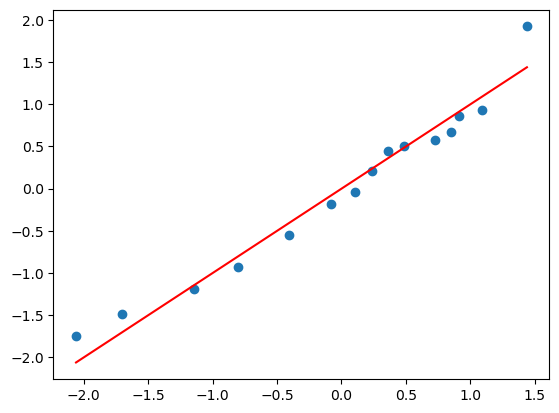

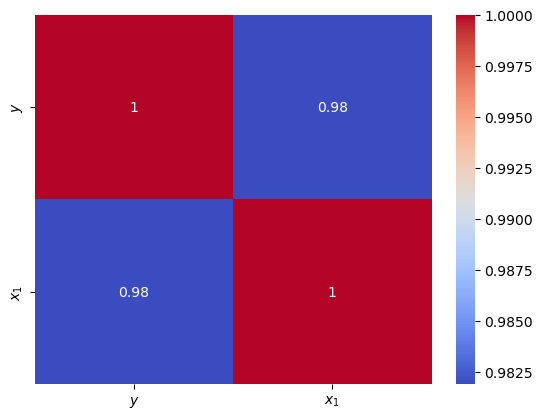

Уравнение нелинейной регрессии:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Уравнение линейной регрессии:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

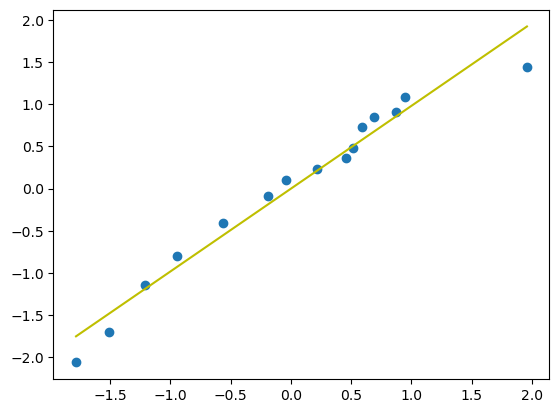

In [ ]:
s1=StandardScaler()
t3['ln_std_Q']=s1.fit_transform(t3['lnQ'].values.reshape(-1,1))
t3['ln_std_L']=s1.fit_transform(t3['lnL'].values.reshape(-1,1))
t3['ln_std_K']=s1.fit_transform(t3['lnK'].values.reshape(-1,1))

display(t3)

m5 = OLS(t3[['ln_std_Q']],t3[['ln_std_L','ln_std_K']]).fit()
display(m5.summary())
make_model_outputs(m5,0.05)

print('\n\nКоэффициент при стандартизированном ln(K) не значим по t-критерию стьдента, значит его не стоит учитывать. Построим модель без него. ')






m6 = OLS(t3[['ln_std_Q']],t3[['ln_std_L']]).fit()
display(m6.summary())
make_model_outputs(m6,0.05)

b_1,K,L, E= symbols('beta_1, K,L, epsilon')
Q = L**b_1 + E
print(f'Уравнение нелинейной регрессии:')
display(Math('Q = '+latex(Q)))
Q = Q.subs(b_1,round(m6.params.iloc[0],4))

display(Math('Q = '+latex(Q)))
b_1,K,L, E= symbols('beta_1, K,ln(L), epsilon')
Q = L*b_1 + E
print(f'Уравнение линейной регрессии:')
display(Math('ln(Q) = '+latex(Q)))
Q = Q.subs(b_1,round(m6.params.iloc[0],4))
display(Math('ln(Q) = '+latex(Q)))

xx= np.linspace(t3[['ln_std_L']].min(), t3[['ln_std_L']].max(), 100)
yy= m6.predict(xx).reshape(-1, 1)

plt.scatter(t3[['ln_std_L']].values,t3[['ln_std_Q']].values)
plt.plot(xx,yy,c='y')
plt.show()

# 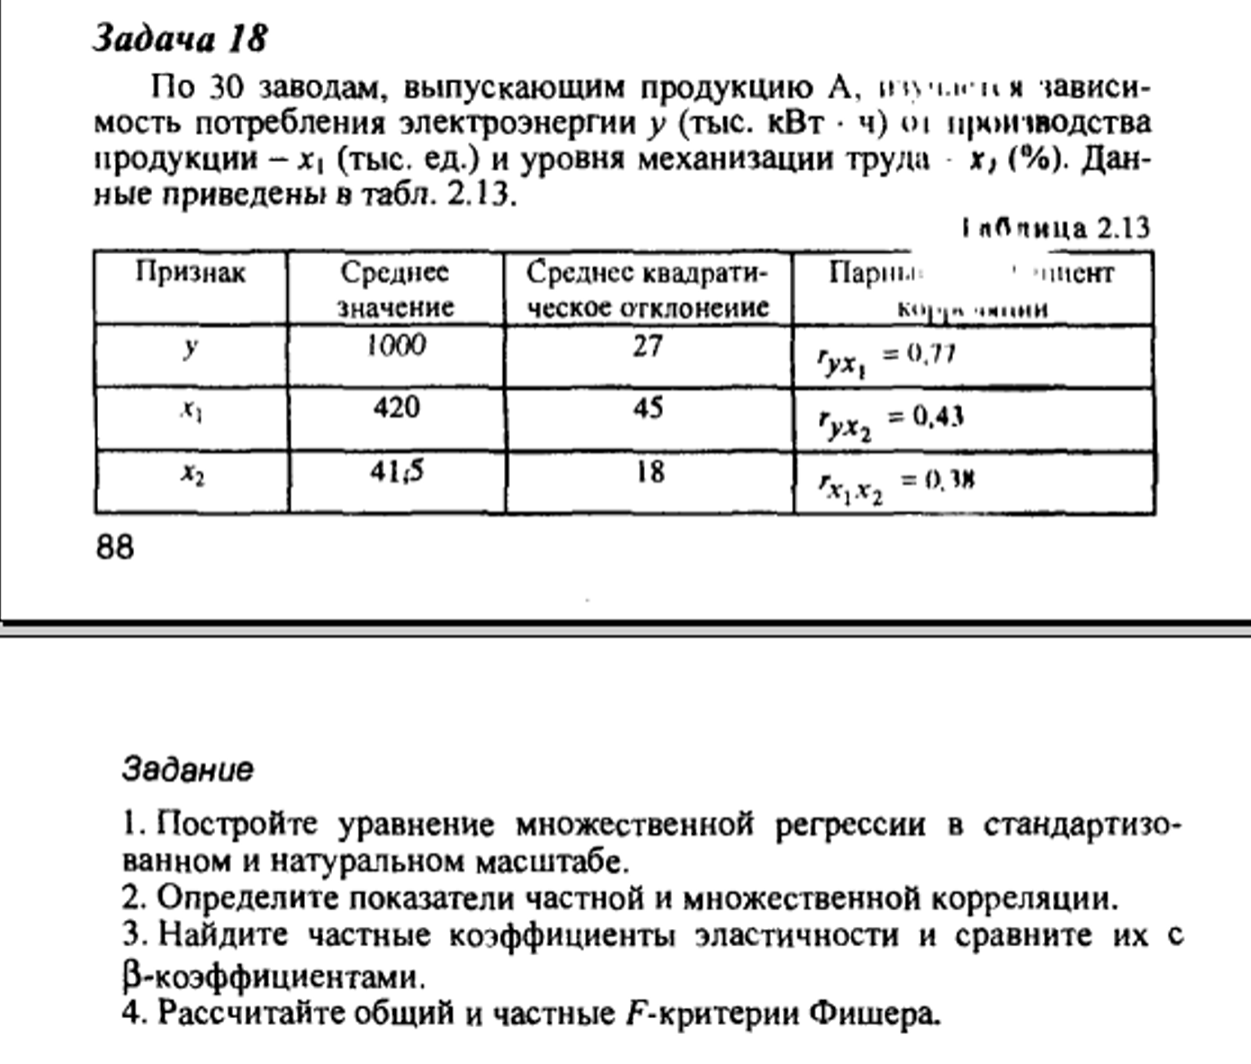

# 

$$
\mathbb{E}(Y)=1000\\
\mathbb{E}(X1)=420\\
\mathbb{E}(X2)=41,5\\
Построим~матрицу~парных~корреляций:\\~\\
\begin{array}{|c|c|c|}
\hline
1& & \\
\hline
r_{Y~X1}& 1& \\
\hline
r_{Y~X2}&r_{X1~X2}& 1\\
\hline
\end{array}\\
~\\
\begin{array}{|c|c|c|}
\hline
1& & \\
\hline
0,77& 1& \\
\hline
0,43&0,38 & 1\\
\hline
\end{array}\\~\\~\\
Построим~матрицы:\\~\\
R_X=
\begin{pmatrix}
  1 & r_{X1~X2}\\
  r_{X1~X2}& 1 \\
\end{pmatrix}\\~\\
r_Y=
\begin{pmatrix}
  r_{Y~X1}\\
  r_{Y~X2}\\
\end{pmatrix}\\~\\~\\
$$

In [ ]:
np.set_printoptions(suppress=True)
########################################################################################################################################################################
#ДАННЫЕ
########################################################################################################################################################################
n_res=30
R = np.matrix([[1,0.77,0.43],[0.77,1,0.38],[0.43,0.38,1]])
S= np.matrix([[27],[45],[18]])
E = np.matrix([[1000],[420],[41.5]])
########################################################################################################################################################################
#ПОДСЧЕТ ИСХОДЯ ИЗ ДАННЫХ
########################################################################################################################################################################
RX = R[1:,1:]
r= R[1:,0]
#1
b = (RX**-1)@r
beta = (RX**-1)@r
b=np.multiply(b*S[0],1/S[1:])
b_0=E[0]-np.sum(np.multiply(b[0:],E[1:]))
b = np.matrix(np.vstack((np.array(b_0),np.array(b))))
#2
partial_corr_matrix=np.matrix([[ ((-R**-1)[i,j]/np.sqrt((R**-1)[i,i]*(R**-1)[j,j])) if i!=j else 1 for j in range((R**-1).shape[1])] for i in range((R**-1).shape[0])])
R_mnoj=np.sqrt(r.T@(RX**-1)@r)[0,0]
#3
elas=np.multiply(b[1:]/E[0],E[1:])
compares=np.where(elas>beta[1:])
#4
fisher=np.array([[ partial_corr_matrix[i,j]**2*(n_res-E.shape[0])/((1-partial_corr_matrix[i,j]**2)*(E.shape[0]-1)) if i!=j else R_mnoj**2*(n_res-E.shape[0])/((1-R_mnoj**2)*(E.shape[0]-1)) for j in range((R).shape[1])] for i in range((R).shape[0])])[0,:].reshape(R.shape[0])
########################################################################################################################################################################
#ВЫВОД ИНФОРМАЦИИ
########################################################################################################################################################################
display(Latex('$№1$'))
display(Latex('$Построим~уравнение~регрессии~в~натуральном~масштабе:$'))
y1 = '$y = '+''.join(['+' + str(b[i,0])+f'x_{i}' if str(b[i,0])[0]!='-' else str(b[i,0])+f'x_{i}' for i in range(len(b))])[1:].replace('x_0','')+'$'
display(Latex(y1))
display(Latex('$Построим~уравнение~регрессии~в~стандартизированном~масштабе:$'))
y = '$y = '+''.join(['+' + str(beta[i,0])+f'x_{i+1}' if str(beta[i,0])[0]!='-' else str(beta[i,0])+f'x_{i}' for i in range(len(beta))])[1:]+'$'
display(Latex(y))
########################################################################################################################################################################
display(Latex('$№2$'))
display(Latex('''
Формула для частной корреляции между переменными $X_i $ и $ X_j $ с учётом всех остальных переменных выглядит следующим образом:

$r_{ij \cdot other} = -\Omega_{ij}/\sqrt{\Omega_{ii} \Omega_{jj}}$

Где $ \Omega $ — это обратная корреляционная матрица.

По этой формуле посчитаем все частные корреляции:

'''))
for i in range(partial_corr_matrix.shape[0]):
    for j in range(i,partial_corr_matrix.shape[1]):
        if i!=j:
            if i==0:
                display(Math(('r_{Y'+f'X_{j}'+'}=') + latex(partial_corr_matrix[i,j])))
            else:
                display(Math(('r_{'+f'X_{i}'+f'X_{j}'+'}=') + latex(partial_corr_matrix[i,j])))
display(Latex(f'$Коэффициент~множественной~корреляции~равен:~~{R_mnoj}~$'))
########################################################################################################################################################################
display(Latex('$№3$'))
for i in range(elas.shape[0]):
    display(Math(f'Частный~коэффициент~элатичности~при~X_{i+1}~=~'+ latex(elas[i,0])))
    display(Latex(f'$Этот~коэффициент~{"больше" if compares[0] else "меньше"}~чем~коэффициент~'+'\\beta_{'+f'X_{i+1}'+'}~~~~~~~~~~$'))
########################################################################################################################################################################
display(Latex('$№4$'))
for i in range(fisher.shape[0]):
    if i==0:
        display(Math(('F_{общий}=') + latex(fisher[i])))
    else:
        display(Math(('F_{'+f'X_{i}'+'}=') + latex(fisher[i])))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Math object>

<IPython.core.display.Latex object>

<IPython.core.display.Math object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>